# Parte I. NLP



## Título del Proyecto
"Análisis de Texto del Ensayo 'La Epopeya de Cancerbero: Un Viaje a Través del Infierno'"

### Introducción
Este proyecto aborda el análisis de texto del ensayo titulado "La Epopeya de Cancerbero: Un Viaje a Través del Infierno" escrito por Yorkis Guerrero el 17 de octubre de 2023. El ensayo explora la narrativa de la canción "Es Épico" de Canserbero, una obra rica en simbolismo mitológico y filosófico que narra un viaje al inframundo en busca de venganza.

### Abstract
Este trabajo realiza un análisis de texto aplicado al ensayo de Yorkis Guerrero sobre la canción "Es Épico" de Canserbero. El objetivo es identificar y extraer patrones temáticos, palabras clave y conceptos filosóficos presentes en la narrativa. El análisis se enfoca en cómo se presentan y entrelazan los temas de valentía, justicia, y reflexión existencial a lo largo del texto.

### Objetivo
El objetivo de este proyecto es realizar un análisis del ensayo utilizando técnicas de minería de texto.

### Contexto Analítico
La canción "Es Épico" es una pieza central en la discografía de Canserbero, conocida por su contenido lírico denso y profundo. Guerrero, a través de su ensayo, analiza esta canción bajo una lente mitológica y filosófica, describiendo el viaje del protagonista al inframundo como una metáfora de la lucha interna del ser humano contra sus propios demonios. Este análisis textual se enfocará en extraer y categorizar los temas dominantes, las referencias simbólicas y las reflexiones filosóficas presentes en el ensayo para proporcionar una comprensión más profunda de la interpretación de Guerrero sobre la obra de Canserbero.

### Carga de datos


In [ ]:
#instalamos los paquetes que usaremos para leer URL donde se aloja el articulo/ensayo que estaremos analizando
#requests: se utiliza para descargar el contenido de una página web.
#beautifulsoup4: se utiliza para navegar por la estructura del documento leido con requests, encontrar y extraer datos
pip install requests beautifulsoup4


SyntaxError: invalid syntax (<ipython-input-5-37c2f405a32d>, line 4)

In [ ]:
import requests
from bs4 import BeautifulSoup

# El ensayo que analizaremos se encuentra en Medium
url = "https://medium.com/@uxyorkis/la-epopeya-de-cancerbero-un-viaje-a-trav%C3%A9s-del-infierno-5a423b71e44e"

# El código suele traer contenido que no es relevante para análisis. Para esto identificamos frases para identificar el inicio y el fin del contenido relevante
frase_inicial = "La música, en su esencia más pura"
frase_final = "Cancerbero con el diablo y cómo estos elementos mitológicos y filosóficos se entrelazan en su odisea."

# Enviar una solicitud GET para obtener el contenido HTML bruto
response = requests.get(url)
if response.status_code == 200: #valida si la página carga correctamente
    # Parsear el contenido HTML (para que Python lo entienda) usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraer todo el texto de las etiquetas de párrafo <p>
    paragraphs = soup.find_all('p')
    article_text = '\n'.join([para.get_text() for para in paragraphs])#se une todo el texto y separa salto de linea

    # Extraer la porción relevante del texto
    start_index = article_text.find(frase_inicial)
    end_index = article_text.find(frase_final) + len(frase_final)
#Si ambas frases (inicial y final) se encuentran en el texto, se extrae el bloque de texto entre esas frases.
    if start_index != -1 and end_index != -1:
        texto_relevante = article_text[start_index:end_index]
        print(texto_relevante)
    else:
        print("No se encontraron las frases especificadas en el artículo.")
else:
    print(f"Fallo al recuperar la página web. Código de estado: {response.status_code}")


La música, en su esencia más pura, es capaz de trascender las barreras del tiempo y el espacio para transmitir emociones, contar historias y provocar reflexiones profundas en quien la escucha. En el vasto panorama de la música urbana, una canción en particular ha destacado por su carácter épica y su capacidad para llevarnos en un viaje a través de las vastas extensiones del conocimiento humano. Esta canción es “Es Épico” de Cancerbero. En lo profundo de la lírica de esta canción se encuentra una odisea emocional que nos sumerge en el inframundo de la mitología y la vida. A medida que exploramos los versos cargados de simbolismo y metáfora, nos adentramos en un viaje que desafía la percepción de la realidad y nos enfrenta a dilemas existenciales y culturales.
“Es Épico” no es una simple canción; es una obra maestra que fusiona elementos de mitología y filosofía en un torrente de palabras y melodías. Acompáñame en este viaje, mientras navegamos por las aguas tumultuosas de la mente de Ca

### Prepocesamiento de texto


In [ ]:
#importamos los paquetes a utilizar
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Tokenización

##### Oraciones

In [ ]:
#Aplicamos metodo  para tokenizar oracion
tokenized_oracion=sent_tokenize(texto_relevante)
print(tokenized_oracion)

['La música, en su esencia más pura, es capaz de trascender las barreras del tiempo y el espacio para transmitir emociones, contar historias y provocar reflexiones profundas en quien la escucha.', 'En el vasto panorama de la música urbana, una canción en particular ha destacado por su carácter épica y su capacidad para llevarnos en un viaje a través de las vastas extensiones del conocimiento humano.', 'Esta canción es “Es Épico” de Cancerbero.', 'En lo profundo de la lírica de esta canción se encuentra una odisea emocional que nos sumerge en el inframundo de la mitología y la vida.', 'A medida que exploramos los versos cargados de simbolismo y metáfora, nos adentramos en un viaje que desafía la percepción de la realidad y nos enfrenta a dilemas existenciales y culturales.', '“Es Épico” no es una simple canción; es una obra maestra que fusiona elementos de mitología y filosofía en un torrente de palabras y melodías.', 'Acompáñame en este viaje, mientras navegamos por las aguas tumultuos

##### Palabras

In [ ]:
#Aplicamos metodo  para tokenizar palabras

tokenized_palabra=word_tokenize(texto_relevante)
print(tokenized_palabra)

['La', 'música', ',', 'en', 'su', 'esencia', 'más', 'pura', ',', 'es', 'capaz', 'de', 'trascender', 'las', 'barreras', 'del', 'tiempo', 'y', 'el', 'espacio', 'para', 'transmitir', 'emociones', ',', 'contar', 'historias', 'y', 'provocar', 'reflexiones', 'profundas', 'en', 'quien', 'la', 'escucha', '.', 'En', 'el', 'vasto', 'panorama', 'de', 'la', 'música', 'urbana', ',', 'una', 'canción', 'en', 'particular', 'ha', 'destacado', 'por', 'su', 'carácter', 'épica', 'y', 'su', 'capacidad', 'para', 'llevarnos', 'en', 'un', 'viaje', 'a', 'través', 'de', 'las', 'vastas', 'extensiones', 'del', 'conocimiento', 'humano', '.', 'Esta', 'canción', 'es', '“', 'Es', 'Épico', '”', 'de', 'Cancerbero', '.', 'En', 'lo', 'profundo', 'de', 'la', 'lírica', 'de', 'esta', 'canción', 'se', 'encuentra', 'una', 'odisea', 'emocional', 'que', 'nos', 'sumerge', 'en', 'el', 'inframundo', 'de', 'la', 'mitología', 'y', 'la', 'vida', '.', 'A', 'medida', 'que', 'exploramos', 'los', 'versos', 'cargados', 'de', 'simbolismo',

##### Conteo de palabras

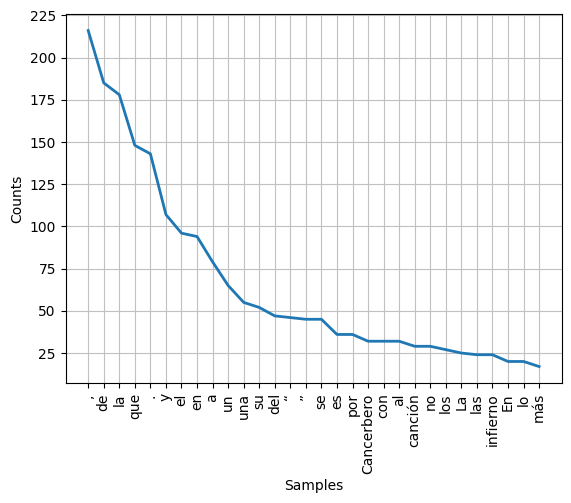

In [ ]:
fdist = FreqDist(tokenized_palabra)
fdist.plot(30,cumulative=False)
plt.show()


Vemos que seria de gran utilidad excluir stopwords y simbolos para profundizar analisis.


### Stopwords

In [ ]:
#usamos los stopwords en espanol y damos un vistazo
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'sintiendo', 'estando', 'tenidas', 'la', 'mis', 'hayas', 'estuviesen', 'habrán', 'al', 'seremos', 'seréis', 'habida', 'estuvisteis', 'algunos', 'hubieras', 'cuando', 'es', 'hayáis', 'tuvisteis', 'son', 'ellas', 'tuviera', 'tus', 'habrían', 'estaríamos', 'estuve', 'nada', 'tienen', 'estén', 'habíamos', 'les', 'vuestro', 'estuviese', 'sería', 'tendrían', 'estas', 'desde', 'seas', 'estaréis', 'ella', 'estuvieses', 'ha', 'vuestros', 'hubieseis', 'sentidos', 'fui', 'qué', 'había', 'tuyos', 'hubiéramos', 'mía', 'otro', 'vuestra', 'estad', 'hubiésemos', 'tuviesen', 'entre', 'tuve', 'hube', 'eras', 'tendríais', 'habrás', 'del', 'sin', 'tuviésemos', 'esta', 'tu', 'seré', 'que', 'por', 'todos', 'uno', 'donde', 'eres', 'esa', 'haya', 'sentid', 'habéis', 'están', 'estuvo', 'fueses', 'fuiste', 'eran', 'nuestras', 'estuviera', 'hayan', 'tanto', 'estáis', 'poco', 'estos', 'tenemos', 'otras', 'sus', 'sea', 'serás', 'fueran', 'quien', 'de', 'estabas', 'estuvieron', 'cual', 'habremos', 'contra', 'estar

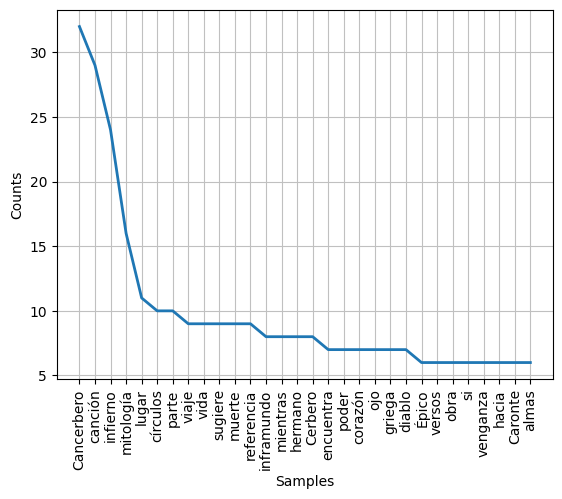

In [ ]:
#Ahora comparamos el gráfico de frecuencia de palabras con y sin stopwords adicionalmente excluimos los símbolos
tokenized_palabra_stopwords = [word for word in tokenized_palabra if word.lower() not in stop_words and word.isalpha()]

# Calculamos la distribución de frecuencia
fdist_stopwords = FreqDist(tokenized_palabra_stopwords)
# Graficamos la distribución de frecuencia del top 30 palabras mas conumes
fdist_stopwords.plot(30, cumulative=False)
plt.show()

Vamos que Cancerbero, cancion e infierno son el top 3 palabras mas repetidas.

### Nube de palabras

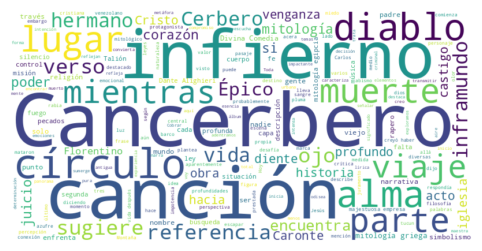

In [ ]:
# Creamos un objeto de nube de palabras
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    stopwords = stop_words
).generate(texto_relevante)

# Mostramos la nube de palabras generada
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### n-grams

In [ ]:
# Aplicamos funcion para calcular n-grams
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return Counter(n_grams)

# Calcular bigrams, trigrams y 4-grams
bigrams = get_ngrams(tokenized_palabra_stopwords, 2)
trigrams = get_ngrams(tokenized_palabra_stopwords, 3)
fourgrams = get_ngrams(tokenized_palabra_stopwords, 4)

# Imprimir los n-grams más comunes
print("Bigrams más comunes:")
print(bigrams.most_common(10))

print("\nTrigrams más comunes:")
print(trigrams.most_common(10))

print("\n4-grams más comunes:")
print(fourgrams.most_common(10))

Bigrams más comunes:
[(('mitología', 'griega'), 6), (('Divina', 'Comedia'), 5), (('canción', 'Épico'), 4), (('círculos', 'infierno'), 4), (('ley', 'Talión'), 4), (('Dante', 'Alighieri'), 4), (('mitología', 'egipcia'), 4), (('narrativa', 'canción'), 4), (('majestuosa', 'empresa'), 4), (('ojo', 'ojo'), 3)]

Trigrams más comunes:
[(('vida', 'después', 'muerte'), 3), (('canción', 'Épico', 'Cancerbero'), 2), (('medida', 'exploramos', 'versos'), 2), (('simbolismo', 'metáfora', 'adentramos'), 2), (('menos', 'convierta', 'muerto'), 2), (('diente', 'ojo', 'ojo'), 2), (('venganza', 'muerte', 'hermano'), 2), (('juramento', 'hizo', 'padre'), 2), (('creyó', 'haber', 'fallado'), 2), (('referencia', 'mitología', 'griega'), 2)]

4-grams más comunes:
[(('sitio', 'círculos', 'montón', 'gente'), 2), (('mitología', 'egipcia', 'narrativa', 'canción'), 2), (('plantea', 'idea', 'Iglesia', 'utiliza'), 2), (('idea', 'Iglesia', 'utiliza', 'figura'), 2), (('Iglesia', 'utiliza', 'figura', 'Cristo'), 2), (('utiliz

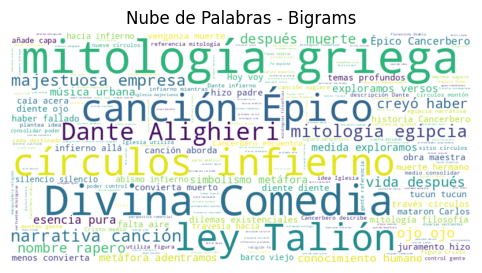

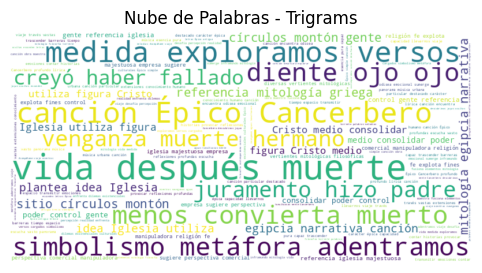

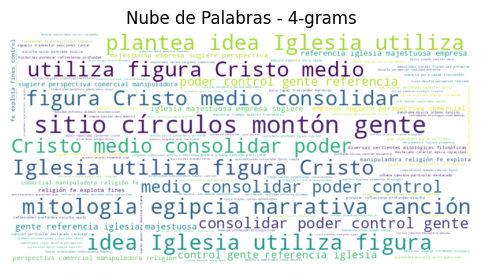

In [ ]:
def generate_wordcloud(ngrams_counter, title):
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_dict)

    plt.figure(figsize=(8, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generar nubes de palabras para cada n-grama
generate_wordcloud(bigrams, 'Nube de Palabras - Bigrams')
generate_wordcloud(trigrams, 'Nube de Palabras - Trigrams')
generate_wordcloud(fourgrams, 'Nube de Palabras - 4-grams')

### Conclusión

En este proyecto, se implementaron diversas técnicas de minería de texto para analizar el ensayo "La Epopeya de Cancerbero: Un Viaje a Través del Infierno". A través de este análisis, se identificaron palabras clave y n-grams que resaltan los conceptos principales abordados en el texto. Entre los términos más relevantes se encuentran referencias a la mitología griega y egipcia, la ley del Talión, Dante Alighieri, vida después de la muerte, simbolismos, metáforas, así como menciones a la iglesia y Cristo.








# Parte II. Deep learning



## Título del Proyecto
Clasificación de Imágenes de Prendas de Vestir Usando Redes Neuronales Profundas con el Dataset Fashion-MNIST



### Introducción
Fashion-MNIST es un dataset que contiene imágenes de artículos de moda de Zalando. Este conjunto de datos ha sido diseñado como un reemplazo directo del famoso dataset MNIST, que consiste en imágenes de dígitos escritos a mano. Al igual que MNIST, Fashion-MNIST contiene imágenes en escala de grises de 28x28 píxeles, pero en lugar de dígitos, las imágenes representan diferentes tipos de prendas de vestir. El objetivo principal de este proyecto es implementar y entrenar modelos de deep learning para clasificar estas imágenes en una de las diez categorías de prendas disponibles en el dataset.


### Abstract
En este proyecto, se propone el uso de redes neuronales profundas para la clasificación de imágenes de prendas de vestir utilizando el dataset Fashion-MNIST. Este conjunto de datos incluye 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba, cada una asociada con una etiqueta que indica la categoría de la prenda. Implementaremos modelos de deep learning, comenzando con una red neuronal simple y evolucionando hacia arquitecturas más complejas como redes convolucionales. A través de este proceso, analizaremos el rendimiento de los modelos y exploraremos cómo la inclusión de diferentes capas y técnicas de regularización puede mejorar la precisión en la clasificación.


### Objetivo
El objetivo principal de este proyecto es desarrollar un modelo de deep learning capaz de clasificar imágenes de prendas de vestir en una de las diez categorías disponibles en el dataset Fashion-MNIST. Además, se busca comparar el rendimiento de diferentes arquitecturas de redes neuronales, desde modelos simples hasta modelos más complejos, evaluando cómo cada modificación impacta en la precisión y generalización del modelo.



### Contexto Analítico

Fashion-MNIST es un conjunto de datos que contiene imágenes de artículos de moda de Zalando, estructurado de manera similar al famoso dataset MNIST de dígitos escritos a mano. El dataset incluye 70,000 imágenes en total: 60,000 ejemplos para entrenamiento y 10,000 para pruebas. Cada imagen es en escala de grises con una resolución de 28x28 píxeles, y está asociada a una etiqueta que representa una de las diez clases de prendas de vestir, como camisetas, pantalones, y zapatos.

El dataset Fashion-MNIST fue creado con la intención de ofrecer un desafío mayor que el MNIST original, ya que las imágenes de prendas de vestir presentan variaciones más sutiles y complejas en comparación con los dígitos manuscritos. Este proyecto explorará cómo las redes neuronales profundas pueden ser entrenadas para reconocer estas variaciones y realizar una clasificación precisa de las imágenes. Las técnicas de deep learning aplicadas en este proyecto se evaluarán en términos de su capacidad para mejorar la precisión del modelo y su capacidad de generalización al clasificar nuevos ejemplos no vistos durante el entrenamiento.

### Diccionario

A cada ejemplo de entrenamiento y prueba originalmente ya se le asigna una de las siguientes etiquetas:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

### Preprocesamiento

In [2]:
#importamos paquetes a utilizar
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargamos el dataset Fashion-MNIST directamente desde TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizamos los valores de los píxeles a un rango de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Imprimir la forma de los datos cargados para verificar
print(f"Forma de train_images: {train_images.shape}")
print(f"Forma de train_labels: {train_labels.shape}")
print(f"Forma de test_images: {test_images.shape}")
print(f"Forma de test_labels: {test_labels.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Forma de train_images: (60000, 28, 28)
Forma de train_labels: (60000,)
Forma de test_images: (10000, 28, 28)
Forma de test_labels: (10000,)


Distribución de las clases: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


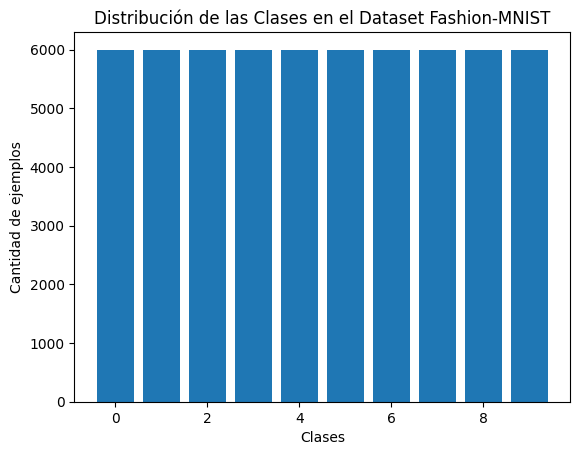

In [5]:
# Contamos la cantidad de ejemplos por clase
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de las clases: {class_distribution}")

# Mostramos la distribución de las clases
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Clases')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de las Clases en el Dataset Fashion-MNIST')
plt.show()



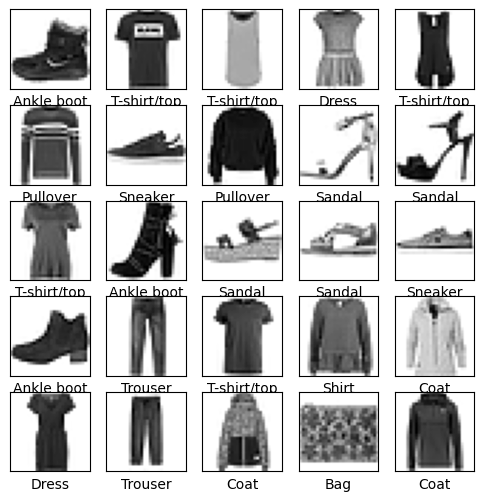

In [11]:
# Visualizamos algunas imágenes de entrenamiento con sus etiquetas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


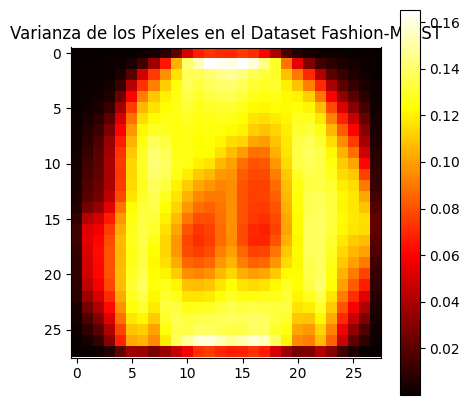

In [10]:
# Calculamos la varianza de los píxeles a través de todas las imágenes
pixel_variance = np.var(train_images, axis=0)

# Visualizamos la varianza de los píxeles
plt.figure(figsize=(5, 5))
plt.imshow(pixel_variance, cmap='hot')
plt.colorbar()
plt.title('Varianza de los Píxeles en el Dataset Fashion-MNIST')
plt.show()

Este mapa de calor de varianza indica que la mayor parte de la información relevante para la clasificación de las prendas en el dataset Fashion-MNIST se encuentra en la parte central de las imágenes. Esto es consistente con la idea de que las prendas de vestir suelen estar centradas en las imágenes y que las características distintivas que ayudan a diferenciarlas se encuentran principalmente en esa región. Esta información es útil para comprender cómo se pueden procesar las imágenes de manera más eficiente y para ajustar el diseño de la red neuronal convolucional que se utilizará en el proyecto.








### Red reuronal 1

Para esta primera red neuronal es simple. Su arquitectura es la siguiente:

Capa de Entrada:

* Flatten(input_shape=(28, 28)): Esta capa convierte las imágenes de 28x28 píxeles en un vector de 784 elementos (28 * 28). No se realiza ninguna transformación más allá de "aplanar" la imagen.
Capa Oculta:

* Dense(128, activation='relu'): Una capa densa (fully connected) con 128 neuronas y la función de activación ReLU (Rectified Linear Unit). Esta capa captura patrones en los datos, pero debido a la naturaleza de la red, solo considera las relaciones entre los píxeles de manera global.

Capa de Salida:

* Dense(10, activation='softmax'): Una capa densa con 10 neuronas (una por cada clase en Fashion-MNIST) y la función de activación softmax, que produce una distribución de probabilidad sobre las clases.

In [6]:
modelo1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelo1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = modelo1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7750 - loss: 0.6358 - val_accuracy: 0.8332 - val_loss: 0.4570
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8608 - loss: 0.3859 - val_accuracy: 0.8453 - val_loss: 0.4431
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8726 - loss: 0.3517 - val_accuracy: 0.8619 - val_loss: 0.3746
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.3070 - val_accuracy: 0.8709 - val_loss: 0.3632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8905 - loss: 0.2945 - val_accuracy: 0.8748 - val_loss: 0.3529


El modelo simple muestra una precisión aceptable, con un val_accuracy de 87.48 pero podría mejorarse. Cabe resaltar que algunas clases, como 'Shirt' y 'T-shirt', podrían ser más difíciles de diferenciar debido a su similitud.


### Red neuronal 2


Para mejorar los resultados percibidos anteriomente,procedemos a anadir capas adicionales:

El Modelo 2 es una red neuronal convolucional (CNN), que es más avanzada y específicamente diseñada para tareas de clasificación de imágenes. Su arquitectura incluye las siguientes capas:

Capa de Entrada: Reconfiguramos las imágenes de 28x28 en una matriz 28x28x1 (1 canal de color), lo que prepara las imágenes para ser procesadas por las capas convolucionales.

Capas Convolucionales y de Pooling:

* Conv2D(32, (3, 3), activation='relu'): Una capa convolucional con 32 filtros de 3x3, que aprende 32 características locales de la imagen. ReLU se usa como función de activación.
* MaxPooling2D((2, 2)): Una capa de pooling que reduce las dimensiones espaciales de la imagen (28x28 se convierte en 14x14), manteniendo las características más importantes y reduciendo el número de parámetros.
* Conv2D(64, (3, 3), activation='relu'): Una segunda capa convolucional con 64 filtros, que aprende características más complejas.
* MaxPooling2D((2, 2)): Otra capa de pooling que reduce aún más las dimensiones espaciales (14x14 se convierte en 7x7).

Capa de Flatten y Densa:

* Flatten(): Aplana las características extraídas por las capas convolucionales en un vector.

* Dense(128, activation='relu'): Una capa densa con 128 neuronas para capturar patrones no lineales a partir de las características extraídas.

* Dropout(0.5): Capa de regularización que desactiva aleatoriamente el 50% de las neuronas durante el entrenamiento para prevenir el sobreajuste.
Capa de Salida:

* Dense(10, activation='softmax'): Igual que en el Modelo 1, produce una distribución de probabilidad sobre las clases.

A partir de esto se espera que este segundo modelo alcance mayor precisión en comparación con el Modelo 1 debido a su capacidad para capturar y aprender características espaciales complejas y tienda a generalizar mejor en datos no vistos, debido al MaxPooling y Dropout.

In [8]:
modelo2 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelo2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = modelo2.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7087 - loss: 0.8048 - val_accuracy: 0.8585 - val_loss: 0.3841
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8481 - loss: 0.4215 - val_accuracy: 0.8791 - val_loss: 0.3370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8682 - loss: 0.3646 - val_accuracy: 0.8845 - val_loss: 0.3088
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8825 - loss: 0.3184 - val_accuracy: 0.8969 - val_loss: 0.2855
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8932 - loss: 0.2994 - val_accuracy: 0.8923 - val_loss: 0.2970


### Comparación de resultados

In [9]:
# Evaluamos el modelo simple
loss_simple, accuracy_simple = modelo1.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión del modelo simple: {accuracy_simple}")

# Evaluamos el modelo mejorado
loss_improved, accuracy_improved = modelo2.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión del modelo mejorado: {accuracy_improved}")


313/313 - 0s - 1ms/step - accuracy: 0.8748 - loss: 0.3529
Precisión del modelo simple: 0.8748000264167786
313/313 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2970
Precisión del modelo mejorado: 0.892300009727478


En resumen, el Modelo 2 es ligeramente superior al Modelo 1 porque está diseñado para manejar la naturaleza espacial de los datos de imágenes.







### Conclusión


Las capas convolucionales del modelo 2 captaron patrones locales, mejorando la precisión.
Se sugiere experimentar con más capas convolucionales, ajustar la tasa de aprendizaje o aplicar técnicas de aumento de datos (data augmentation) para mejorar aún más el rendimiento.